## Imports

In [1]:
import pandas as pd 
import requests
import seaborn as sns
from datetime import datetime

from statsmodels.tsa.arima_model import ARIMA
from fbprophet import Prophet 
import statsmodels.tsa.stattools as ts
 
from helper import clean_data
from helper import split_data
from helper import RMSE

import warnings
warnings.filterwarnings('ignore')

%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


## Data loading & cleaning

In [2]:
weekly_pct, vix_close = clean_data()

## Let's split data up into test and train

In [3]:
#formats data for prophet
weekly_pct['ds']=weekly_pct.index
weekly_pct.columns = ['y', 'prime', 'ds']
prophet_df = weekly_pct[['y','ds']]
df_len = prophet_df.shape[0]
p_train = prophet_df.iloc[:df_len-52*4,:]
p_validation = prophet_df.iloc[df_len-52*4:df_len-52*2]


## Default Prophet

In [4]:
m = Prophet()
m.fit(p_train)
forecast = m.predict(p_validation)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


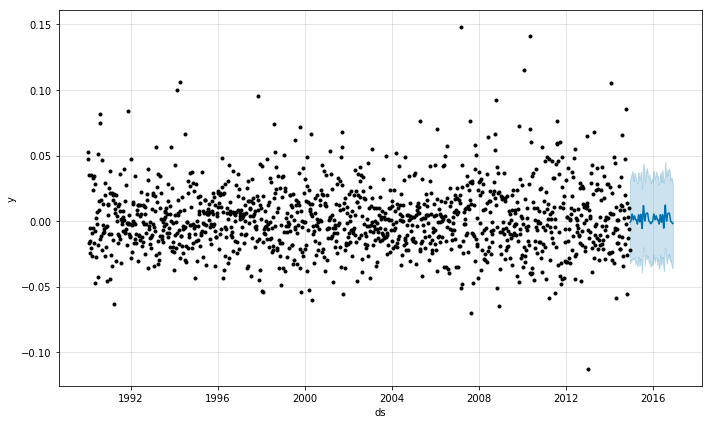

In [5]:
fig1 = m.plot(forecast)

In [6]:
join_df = forecast[['ds','yhat']]

In [7]:
join_df.set_index('ds',inplace=True)

In [8]:
p_validation['preds']=join_df['yhat']

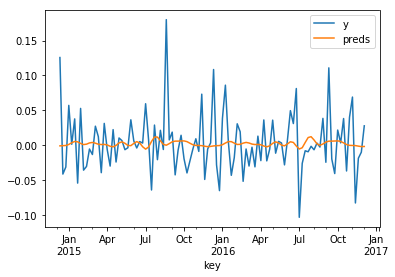

In [9]:
p_validation[['y','preds']].plot()

In [10]:
RMSE(p_validation.y.values,p_validation.preds.values)

0.042572939571580724

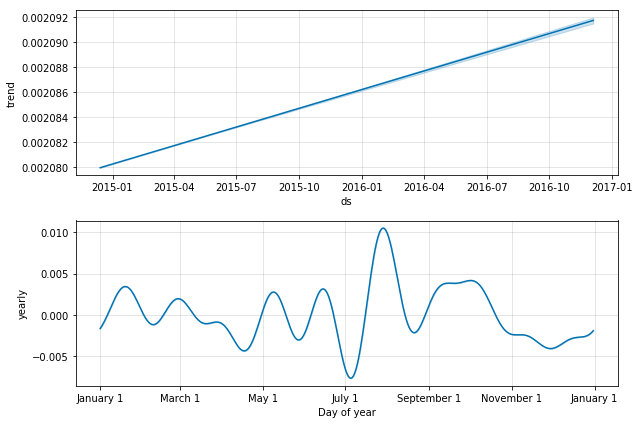

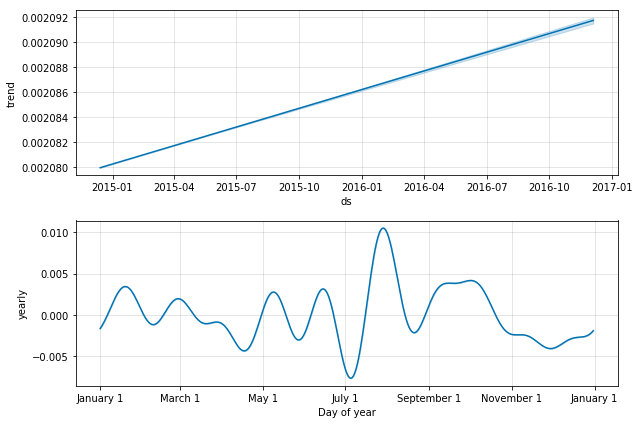

In [11]:
m.plot_components(forecast)
